# Task 1

BY:SANIYA GUPTA

# Stock Prediction

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [6]:
df = pd.read_csv(
    "https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1514764800&period2=1620768000&interval=1d&events=history&includeAdjustedClose=true"
)

df = df[["Date", "Close"]]

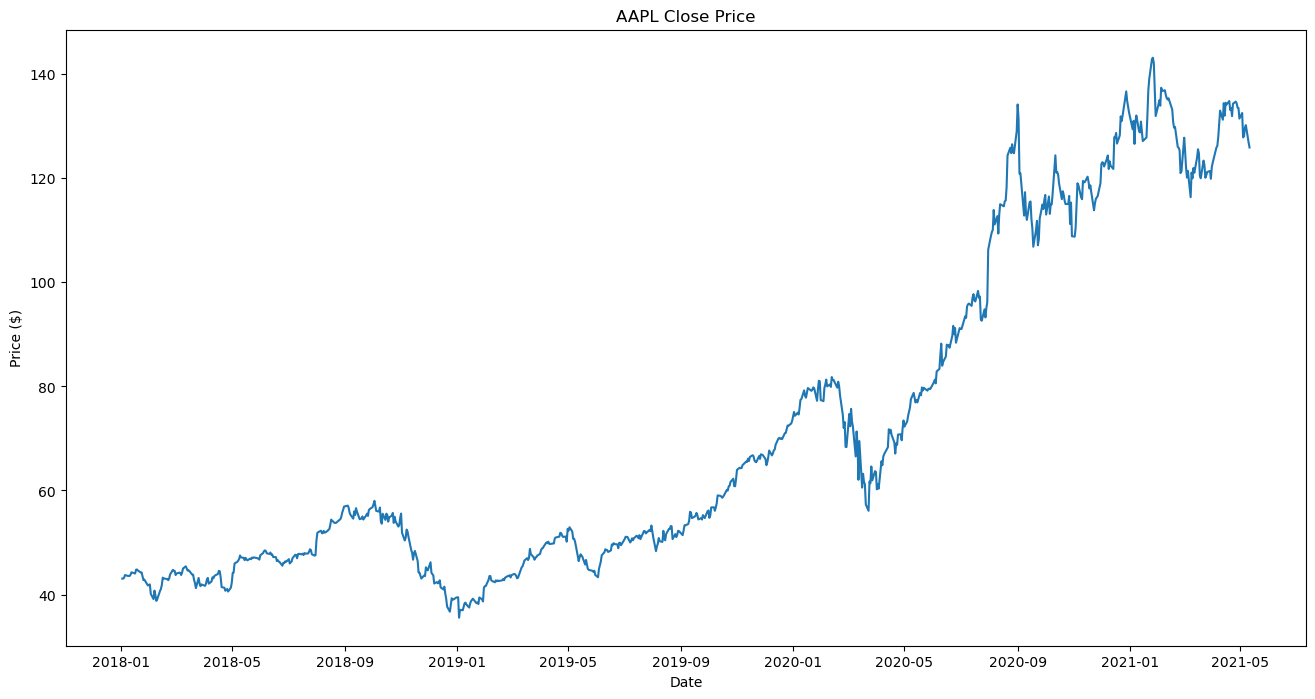

In [7]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
plt.figure(figsize=(16, 8))
plt.plot(df["Close"])
plt.title("AAPL Close Price")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.show()

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df.values)

In [9]:
train_size = int(len(data) * 0.7)
train_data = data[:train_size, :]
test_data = data[train_size:, :]

In [10]:
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i : i + look_back, 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

In [11]:
look_back = 60
train_X, train_Y = create_dataset(train_data, look_back)
test_X, test_Y = create_dataset(test_data, look_back)

train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [12]:
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [13]:
model.fit(train_X, train_Y, epochs=100, batch_size=32, verbose=2)



Epoch 1/100
17/17 - 5s - loss: 0.0129 - 5s/epoch - 315ms/step
Epoch 2/100
17/17 - 1s - loss: 0.0032 - 667ms/epoch - 39ms/step
Epoch 3/100
17/17 - 1s - loss: 0.0017 - 659ms/epoch - 39ms/step
Epoch 4/100
17/17 - 1s - loss: 0.0012 - 671ms/epoch - 39ms/step
Epoch 5/100
17/17 - 1s - loss: 0.0013 - 674ms/epoch - 40ms/step
Epoch 6/100
17/17 - 1s - loss: 0.0011 - 660ms/epoch - 39ms/step
Epoch 7/100
17/17 - 1s - loss: 9.2831e-04 - 664ms/epoch - 39ms/step
Epoch 8/100
17/17 - 1s - loss: 8.4319e-04 - 675ms/epoch - 40ms/step
Epoch 9/100
17/17 - 1s - loss: 9.0222e-04 - 670ms/epoch - 39ms/step
Epoch 10/100
17/17 - 1s - loss: 8.7532e-04 - 657ms/epoch - 39ms/step
Epoch 11/100
17/17 - 1s - loss: 7.7946e-04 - 666ms/epoch - 39ms/step
Epoch 12/100
17/17 - 1s - loss: 7.0156e-04 - 661ms/epoch - 39ms/step
Epoch 13/100
17/17 - 1s - loss: 6.8077e-04 - 658ms/epoch - 39ms/step
Epoch 14/100
17/17 - 1s - loss: 6.3907e-04 - 667ms/epoch - 39ms/step
Epoch 15/100
17/17 - 1s - loss: 6.4562e-04 - 666ms/epoch - 39ms/step


In [14]:
predictions = model.predict(test_X)
predictions = scaler.inverse_transform(predictions)

7/7 [==============================] - 1s 15ms/step


ValueError: x and y must have same first dimension, but have shapes (194,) and (254,)

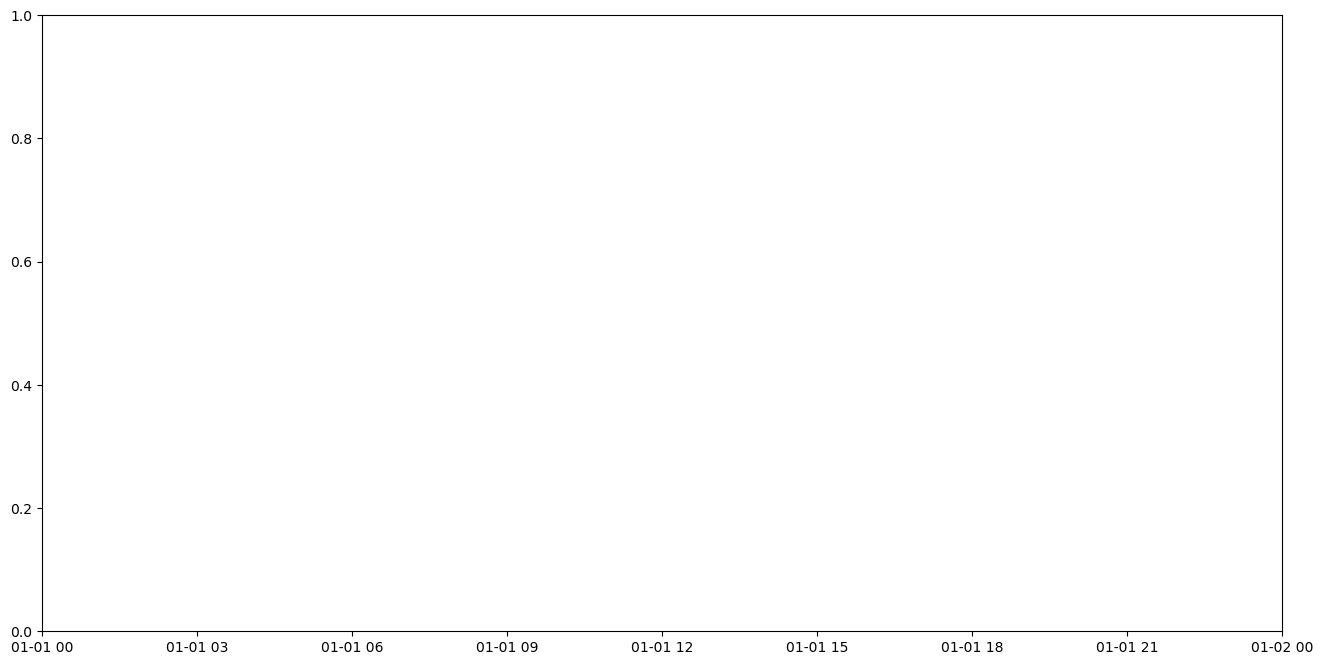

In [15]:
plt.figure(figsize=(16, 8))
plt.plot(df.index[train_size + look_back :], test_data[:, 0], label="Actual")
plt.plot(df.index[train_size + look_back :], predictions[:, 0], label="Predicted")
plt.title("AAPL Close Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()